<a href="https://colab.research.google.com/github/rikymahendra50/UAS_DataAnalytics/blob/main/K_Means_Clustering_Pada_Data_Pengemudi_Go_Track.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

variabel : jarak rata-rata per hari dan kecepatan dalam mengemudi per hari . 

Import Libraries :


1.   Panda untuk membaca dan menulis spreadsheet
2.   Numpy untuk melakukan perhitungan yang efisien
3.   Matplotlib untuk visualisasi data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving go_track_tracks.csv to go_track_tracks.csv
Saving go_track_trackspoints.csv to go_track_trackspoints.csv


Data yang digunakan yakni dataset sampel data pengemudi (driver) pada aplikasi Go-Track. Dibawah ini adalah script untuk menginput data (baris 1) dan membaca data (baris 2)

In [ ]:
driver = pd.read_csv("go_track_tracks.csv")
driver.head()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


Menghilangkan beberapa kolom yang tidak diperlukan . Sehingga hanya menyisakan 4 kolom yakni id , id_android,speed dan distance 

In [ ]:
driver = driver.drop(["linha", "car_or_bus","rating_weather", "rating_bus","rating","time"], axis = 1)
driver.head()

,id,id_android,speed,distance
0,1,0,19.210586,2.652
1,2,0,30.848229,5.290
2,3,1,13.560101,0.918
3,4,1,19.766679,7.700
4,8,0,25.807401,3.995


Menentukan variabel yang akan di klusterkan

In [ ]:
driver_x = driver.iloc[:, 1:3]
driver_x.head()

,id_android,speed
0,0,19.210586
1,0,30.848229
2,1,13.560101
3,1,19.766679
4,0,25.807401


Memvisualkan persebaran data

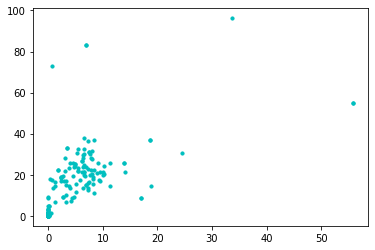

In [ ]:
plt.scatter(driver.distance, driver.speed, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

Mengubah Variabel Data Frame Menjadi Array

In [ ]:
x_array =  np.array(driver_x)
print(x_array)

[[0.00000000e+00 1.92105856e+01]
 [0.00000000e+00 3.08482291e+01]
 [1.00000000e+00 1.35601009e+01]
 [1.00000000e+00 1.97666790e+01]
 [0.00000000e+00 2.58074009e+01]
 [2.00000000e+00 1.34691332e+00]
 [3.00000000e+00 3.68507874e+01]
 [1.00000000e+00 1.74051313e+01]
 [1.00000000e+00 1.53954361e+01]
 [1.00000000e+00 8.90272944e+00]
 [3.00000000e+00 1.50413480e+01]
 [3.00000000e+00 1.44400981e+01]
 [1.00000000e+00 1.63567325e+01]
 [1.00000000e+00 1.75427999e+01]
 [4.00000000e+00 9.45181557e+00]
 [4.00000000e+00 9.45181557e+00]
 [4.00000000e+00 1.62635039e+01]
 [4.00000000e+00 2.12235944e+01]
 [4.00000000e+00 1.94236545e+01]
 [4.00000000e+00 2.07996291e+01]
 [4.00000000e+00 8.72437242e+00]
 [4.00000000e+00 8.72437242e+00]
 [3.00000000e+00 8.68613764e+00]
 [3.00000000e+00 5.49959473e+01]
 [3.00000000e+00 5.49959473e+01]
 [1.00000000e+00 1.26110448e+01]
 [3.00000000e+00 1.45342872e+01]
 [3.00000000e+00 1.02882267e+01]
 [3.00000000e+00 1.83281891e+01]
 [1.00000000e+00 1.71776350e+01]
 [1.000000

Menstandarkan kembali ukuran variabel . Agar data dapat kembali seperti jenis data diawal sebelum di array kan

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.00000000e+00, 1.99600362e-01],
       [0.00000000e+00, 3.20578504e-01],
       [3.70370370e-02, 1.40861225e-01],
       [3.70370370e-02, 2.05381184e-01],
       [0.00000000e+00, 2.68176999e-01],
       [7.40740741e-02, 1.39000630e-02],
       [1.11111111e-01, 3.82977592e-01],
       [3.70370370e-02, 1.80831914e-01],
       [3.70370370e-02, 1.59940297e-01],
       [3.70370370e-02, 9.24459124e-02],
       [1.11111111e-01, 1.56259404e-01],
       [1.11111111e-01, 1.50009162e-01],
       [3.70370370e-02, 1.69933373e-01],
       [3.70370370e-02, 1.82263037e-01],
       [1.48148148e-01, 9.81538910e-02],
       [1.48148148e-01, 9.81538910e-02],
       [1.48148148e-01, 1.68964223e-01],
       [1.48148148e-01, 2.20526426e-01],
       [1.48148148e-01, 2.01815302e-01],
       [1.48148148e-01, 2.16119130e-01],
       [1.48148148e-01, 9.05918170e-02],
       [1.48148148e-01, 9.05918170e-02],
       [1.11111111e-01, 9.01943506e-02],
       [1.11111111e-01, 5.71604072e-01],
       [1.111111

Menentukan dan mengkonfigurasi fungsi kmeans dan Menentukan kluster dari data

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=123)

Memvisualisasikan Kluster

In [ ]:
print(kmeans.cluster_centers_)

[[0.32745444 0.24013088]
 [0.05750487 0.11540774]
 [0.81635802 0.18289936]]


Menampilkan Hasil Kluster dan Menambahkan Kolom "kluster" Dalam Data Frame Driver

In [ ]:
print(kmeans.labels_)
driver["kluster"] = kmeans.labels_

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 2 2 2 2 2 1 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Memvisualisasikan hasil cluster

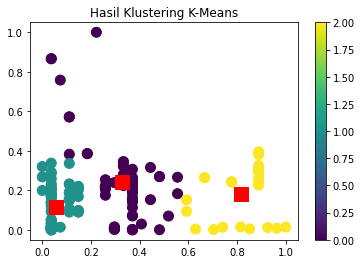

In [ ]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = driver.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()